## Временные ряды
<br/>

### Задание: скользящие средние на биржевых графиках

Используя данные индекса РТС за последние годы \
https://video.ittensive.com/python-advanced/rts-index.csv \
постройте **отдельные графики закрытия (Close)** индекса по дням за **2017, 2018, 2019 годы* в единой оси X.
 
Добавьте на график **экспоненциальное среднее за 20 дней для значения Max за 2017 год.** \
**Найдите последнюю дату**, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году (это последнее пересечение графика за 2019 год и графика для среднего за 2017 год).\

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from datetime import datetime

In [2]:
data = pd.read_csv("https://video.ittensive.com/python-advanced/rts-index.csv", delimiter=",")
data=data.dropna(axis=1, how='all')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True) #, format="DD.MM.YYYY")
# data['Year'] = data['Date'].dt.year
# data = data.set_index(data['Date'])
print(data.shape)
data.head()

(6058, 7)


,Date,Open,Max,Min,Close,"Trading Volume, USD","Market Capitalization, USD"
0,2019-11-18,1456.17,1461.20,1436.74,1443.02,9.016255e+08,1.799203e+11
1,2019-11-15,1440.29,1450.84,1435.54,1449.42,8.869229e+08,1.807188e+11
2,2019-11-14,1438.67,1448.54,1425.44,1436.98,1.149759e+09,1.791677e+11
3,2019-11-13,1443.19,1443.19,1430.91,1437.85,8.875070e+08,1.792759e+11
4,2019-11-12,1461.37,1471.19,1447.83,1449.35,9.772689e+08,1.807094e+11


In [3]:

# Заполняем даты, которые были пропущены в исходных данных
dates = pd.date_range(min(data["Date"]), max(data["Date"]))
# print(dates)
data = data.set_index("Date")
# для этого реиндексируем по полному набору дат с заполнением
# записей для пропущенных дат данными из следующей
data = data.reindex(dates).ffill()
data.index.name = "Date"

# Для приведения дат из разных лет к единому индексу будем использовать номер дня в году
data["Day"] = pd.to_datetime(data.index).dayofyear

# data.index

In [4]:
data = data.sort_index()      # сортировка по датам (индексу)
data_2019 = data.loc["2019"]  # выделение одного 2019 года
data_2019 = data_2019.reset_index().set_index("Day")  # индексация по номеру дня в году
# аналогичное выделение и индексирование данных по 2017 плюс расчет эксп.среднего для Max
data_2017 = data.loc["2017"].reset_index().set_index("Day")["Max"].ewm(span=20).mean()

# теперь оба набора данных проиндексированы одинаково
# можно строить графики

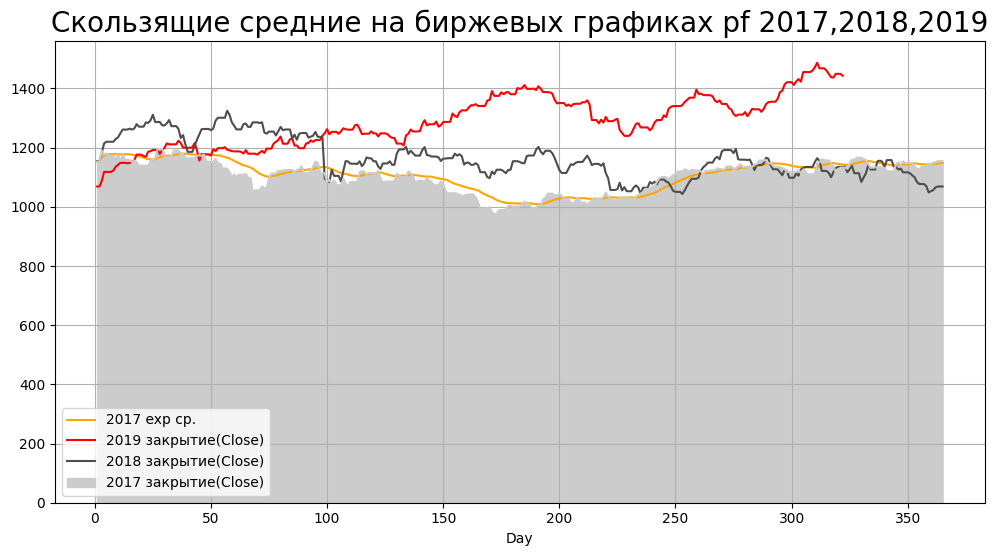

In [14]:
fig = plt.figure(figsize=(12,6))
# (ax1, ax2, ax3) = fig.subplots(3, 1,sharex=True) #, gridspec_kw={'height_ratios': [3, 1]})
ax = plt.subplot(1, 1, 1)

# экспоненциальное среднее за 20 дней для значения Max за 2017 год.
data_2017.plot(color='orange', label="2017 exp ср.")
# отдельные графики закрытия (Close)
data_2019["Close"].plot(color='r', label="2019 закрытие(Close)")
data.loc["2018"].reset_index().set_index("Day")["Close"].plot(color=".3", label="2018 закрытие(Close)")
data.loc["2017"].reset_index().set_index("Day")["Close"].plot.area(color=".8", label="2017 закрытие(Close)")

ax.set_title("Скользящие средние на биржевых графиках pf 2017,2018,2019", fontsize=20)
plt.grid()
plt.legend()

plt.show()

Судя по графикам, **искомая дата (последнее пересечение графика за 2019 год и графика для среднего за 2017 год)** соответствует номеру дня = 50

In [7]:

# Python3 code to demonstrate working of
# Convert day number to date in particular year
# Using datetime.strptime()
from datetime import datetime, date, timedelta

def daynum2date(dayn,yr):
    # initializing day number & year
    day_num = str(dayn) #"50"
    year = str(yr) #"2019"
    # print day number & year
    print(f"День №: {day_num} из {year} года")

    # adjusting day num
    day_num.rjust(3 + len(day_num), '0')
    # Initializing start date
    strt_date = date(int(year), 1, 1)
    # converting to date
    res_date = strt_date + timedelta(days=int(day_num) - 1)
    return res_date.strftime("%d-%m-%Y")


# printing result
print(f"Дата: {daynum2date(50,2019)}")

День №: 50 из 2019 года
Дата: 19-02-2019


In [15]:
# Найдите последнюю дату
# когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году 
# было больше, чем соответствующее значение Close в 2019 году
data_fall = data_2019[data_2019["Close"] < data_2017[0:len(data_2019)]]  # сравниваются серии одинаковой длины

data_fall.set_index("Date", inplace=True)
data_fall = data_fall.sort_index(ascending=False)
print (f"Искомая дата: {data_fall.head(1).index[0]}")

Искомая дата: 2019-02-19 00:00:00
